In [1]:
import os
import fnmatch
import pandas as pd
from datetime import *
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%matplotlib inline

In [32]:
pd.set_option('display.max_columns', 100)

In [3]:
%load_ext autoreload
%autoreload 2

import sys
#import Utils.MajorContract_Offsets
import importlib
from Utils.MajorContract_Offsets import *

import Backtesting.Vectorized.lm_validation
importlib.reload(Backtesting.Vectorized.lm_validation)
from Backtesting.Vectorized.lm_validation import LmValidation

importlib.reload(Backtesting.Vectorized.Strategy)
from Backtesting.Vectorized.Strategy import *

## Rb. Freq=5.

In [22]:
freq=5

In [23]:
offset = [0.1+i for i in range(freq)]

In [24]:
offset

[0.1, 1.1, 2.1, 3.1, 4.1]

In [25]:
rb_train, rb_test, rb_probability_table = MajorContracts(symbol='rb', split_time = '2016-7-1', 
                                                         topdir=r'/Documents/Qishi_QR/Data',
                                          maturity={'1605':['2015-11-1','2016-3-31'],
                                                    '1610':['2016-3-1','2016-8-31'],
                                                    '1701':['2016-8-1','2016-11-30'],
                                                    '1705':['2016-11-1', '2017-3-31']
                                                   },
                                          transitions = {'1605':'2016-3-10', '1610':'2016-8-16', '1701':'2016-11-25',
                                                        '1705':'2017-3-10'},
                                          freq = freq, offset = offset).create_major_overlap()


rb1605 /Users/Shufang/Documents/Qishi_QR/Data/rb
ID trade_range transition_begin transition_end
1605 ['2015-11-1', '2016-3-31'] 2016-01-01 00:00:00 2016-03-10 00:00:00
probability table:  20160104.0 20160309.0
probability table:  20160104.0 20160309.0
probability table:  20160104.0 20160309.0
probability table:  20160104.0 20160309.0
probability table:  20160104.0 20160309.0
rb1610 /Users/Shufang/Documents/Qishi_QR/Data/rb
ID trade_range transition_begin transition_end
1610 ['2016-3-1', '2016-8-31'] 2016-03-10 00:00:00 2016-08-16 00:00:00
probability table:  20160310.0 20160630.0
probability table:  20160310.0 20160630.0
probability table:  20160310.0 20160630.0
probability table:  20160310.0 20160630.0
probability table:  20160310.0 20160630.0
rb1701 /Users/Shufang/Documents/Qishi_QR/Data/rb
ID trade_range transition_begin transition_end
1701 ['2016-8-1', '2016-11-30'] 2016-08-16 00:00:00 2016-11-25 00:00:00
rb1705 /Users/Shufang/Documents/Qishi_QR/Data/rb
ID trade_range transition_be

In [8]:
for offset in rb_test.keys():
    rb_test[offset].to_csv(r'/Documents/Qishi_QR/Output/rb_major_' + str(freq) + '_' + offset + '.csv')
    for contract in ['1605', '1610']:
        rb_probability_table[contract].to_csv(r'/Documents/Qishi_QR/Strategy/rb_'+ contract + '_major_strategy_' + str(freq) + '_' + offset + '.csv', index=False)

In [83]:
#ru
filepath = "C:/Documents/Qishi_QR/Strategy/Rb_5e-4"
fig = plt.figure()
slm = pd.DataFrame()
for path, dirlist, filelist in os.walk(filepath):
    #print(filelist)
    for filename in fnmatch.filter(filelist, "rb_*_major_strategy_5_*.csv"):
        print(filename)
        data = pd.read_csv(os.path.join(path,filename))
             
        slm = slm.append(data[['prior', '0', '1', '2', 'total']].groupby(['prior']).sum().reset_index())
slm = slm.groupby(['prior']).sum().reset_index()
slm['signal'] = slm.loc[:, '0':'2'].idxmax(axis=1)
slm.to_csv('C:/Documents/Qishi_QR/Strategy/Rb_5e-4/rb_major_strategy.csv')
print(slm.head())

rb_1605_major_strategy_5_0.1.csv
rb_1605_major_strategy_5_1.1.csv
rb_1605_major_strategy_5_2.1.csv
rb_1605_major_strategy_5_3.1.csv
rb_1605_major_strategy_5_4.1.csv
rb_1610_major_strategy_5_0.1.csv
rb_1610_major_strategy_5_1.1.csv
rb_1610_major_strategy_5_2.1.csv
rb_1610_major_strategy_5_3.1.csv
rb_1610_major_strategy_5_4.1.csv
   prior      0      1      2   total signal
0      p  50120  74335  78690  203145      2
1     p0  15520  16300  18275   50095      2
2    p00   5805   4460   5250   15515      0
3   p000   2905   1220   1675    5800      0
4  p0000   1875    470    560    2905      0


In [84]:
slm.tail(3)

,prior,0,1,2,total,signal
3277,p2222220,20,15,25,60,2
3278,p2222221,10,75,60,145,1
3279,p2222222,25,75,60,160,1


### Visualize probability table

In [85]:
slm.loc[:, 'len'] = slm['prior'].apply(lambda x: len(x))

In [86]:
slm[slm['len']==3]

,prior,0,1,2,total,signal,len
2,p00,5805,4460,5250,15515,0,3
366,p01,4060,5305,6935,16300,2,3
730,p02,4895,7380,5990,18265,1,3
1095,p10,4390,5230,6580,16200,2,3
1459,p11,4810,8660,11950,25420,2,3
1823,p12,7575,12770,12350,32695,1,3
2188,p20,5325,6585,6445,18355,1,3
2552,p21,7335,11455,13825,32615,2,3
2916,p22,5900,12455,9325,27680,1,3


In [87]:
for l in range(1,9):
    tmp = slm[slm['len']==l]
    print ('='*20)
    print ('len = {}'.format(l))
    print ('signal, counts')
    print (tmp['signal'].value_counts())

len = 1
signal, counts
2    1
Name: signal, dtype: int64
len = 2
signal, counts
2    2
1    1
Name: signal, dtype: int64
len = 3
signal, counts
2    4
1    4
0    1
Name: signal, dtype: int64
len = 4
signal, counts
2    15
1    11
0     1
Name: signal, dtype: int64
len = 5
signal, counts
2    47
1    31
0     3
Name: signal, dtype: int64
len = 6
signal, counts
2    138
1     93
0     12
Name: signal, dtype: int64
len = 7
signal, counts
2    344
1    295
0     90
Name: signal, dtype: int64
len = 8
signal, counts
1    875
2    865
0    447
Name: signal, dtype: int64


In [88]:
slm_ind = {}

for i in range(1, 9):
    mask = (slm.len==i)
    tmp = slm.loc[mask]
    
    tmp.loc[:, 'max_pct'] = tmp.loc[:, '0':'2'].max(axis = 1)/tmp['total']
    print ('Stats for {:d}th order: mean={:10.5f}, std={:10.5f}, min={:10.5f}, max ={:10.5f}'.format( 
        i, tmp.max_pct.mean(), tmp.max_pct.std(), tmp.max_pct.min(), tmp.max_pct.max()))
    
    slm_ind[str(i)] = tmp
    

C:\Users\Shufang\Anaconda3\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\Shufang\Anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Stats for 1th order: mean=   0.38736, std=       nan, min=   0.38736, max =   0.38736
Stats for 2th order: mean=   0.40648, std=   0.03827, min=   0.36481, max =   0.44003
Stats for 3th order: mean=   0.41146, std=   0.03528, min=   0.35876, max =   0.47010
Stats for 4th order: mean=   0.41544, std=   0.04194, min=   0.35294, max =   0.50086
Stats for 5th order: mean=   0.41731, std=   0.04611, min=   0.34731, max =   0.64544
Stats for 6th order: mean=   0.42339, std=   0.05225, min=   0.34109, max =   0.78933
Stats for 7th order: mean=   0.44363, std=   0.06358, min=   0.33708, max =   0.86149
Stats for 8th order: mean=   0.49849, std=   0.10271, min=   0.33333, max =   1.00000


In [70]:
def plot_slm(i_order = '5'):
    slm_ind[i_order].max_pct.plot()
    plt.ylabel('max pct')
    plt.title('{}th order LM'.format(i_order))
    plt.show()

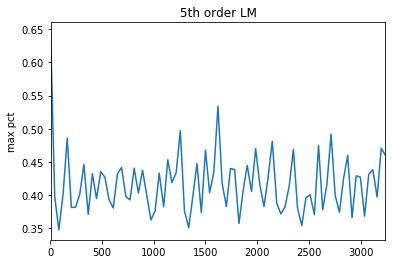

In [71]:
plot_slm()

In [72]:
print ('Daily Std/Mean (%)')
rb_train[str(0.1)].groupby('Date')['LastPrice'].std()/rb_train[str(0.1)].groupby('Date')['LastPrice'].mean()*100

Daily Std/Mean (%)


Date
20160104.0    0.665238
20160105.0    0.325997
20160106.0    0.202676
20160107.0    0.576298
20160108.0    0.192843
20160111.0    0.303745
20160112.0    0.255466
20160113.0    0.109071
20160114.0    0.612703
20160115.0    0.267146
20160118.0    0.320619
20160119.0    0.347210
20160120.0    0.299906
20160121.0    0.220855
20160122.0    0.324563
20160125.0    0.298628
20160126.0    0.145798
20160127.0    0.217312
20160128.0    0.632376
20160129.0    0.499179
20160201.0    0.504519
20160202.0    0.324251
20160203.0    0.515249
20160204.0    0.159728
20160205.0    0.184229
20160215.0    0.628911
20160216.0    0.276940
20160217.0    0.265466
20160218.0    0.270764
20160219.0    0.585332
                ...   
20160518.0    1.503440
20160519.0    0.611058
20160520.0    0.666019
20160523.0    0.750987
20160524.0    0.491601
20160525.0    0.618687
20160526.0    0.549169
20160527.0    2.231754
20160530.0    1.149435
20160531.0    0.593326
20160601.0    0.265651
20160602.0    0.290780
201606

## type 1 threshold

In [73]:
slm_th = SLM(slm, 0.1, th_type=1).run()

In [74]:
slm_th.head()

,prior,0,1,2,total,signal,len,max,max_pct,min,min_pct,threshold
0,p,50120,74335,78690,203145,2,1,2,0.387359,0,0.246720,0.021438
1,p0,15520,16300,18275,50095,2,2,2,0.364807,0,0.309811,0.039425
2,p00,5805,4460,5250,15515,0,3,0,0.374154,1,0.287464,0.035772
3,p000,2905,1220,1675,5800,0,4,0,0.500862,1,0.210345,0.212069
4,p0000,1875,470,560,2905,0,5,0,0.645439,1,0.161790,0.452668


C:\Users\Shufang\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Shufang\Documents\Qishi_QR\Backtesting\Vectorized\backtest.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.result['signal_bar'][0] = 0


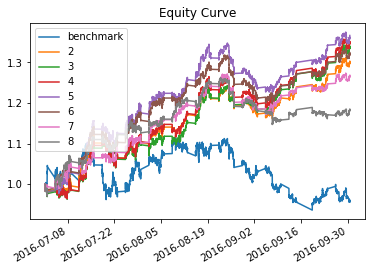

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.303568              0.004176                -0.003107   
1               0.303556              0.004617                -0.003215   
2               0.305159              0.004748                -0.003096   
3               0.317126              0.004922                -0.003331   
4               0.331756              0.004430                -0.003085   
5               0.304355              0.003756                -0.003028   
6               0.305377              0.002689                -0.002663   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.001682                  0.000115             -0.031062   
1                 0.001680                  0.000134             -0.033814   
2                 0.001692                  0.000136             -0.029125   
3                 0.001897                  0.000160             -0.030262   
4        

In [76]:
lm_validation = LmValidation(slm_th, symbol='rb_major', data_dir=r'C:/Documents/Qishi_QR/Output/Rb_5e-4',
                                 valid_dir=r'C:/Documents/Qishi_QR/Validation', max_order=7, offsets_average=True, n_offsets=5)
lm_validation.run()

C:\Users\Shufang\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Shufang\Documents\Qishi_QR\Backtesting\Vectorized\backtest.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.result['signal_bar'][0] = 0


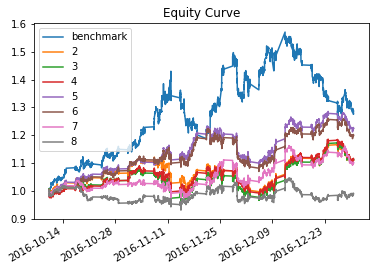

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.408890              0.001792                -0.004159   
1               0.417731              0.001832                -0.004261   
2               0.405128              0.001872                -0.004139   
3               0.407204              0.003450                -0.004414   
4               0.430685              0.003104                -0.004092   
5               0.434993              0.001704                -0.004038   
6               0.412337             -0.000071                -0.003555   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.002105                  0.000050             -0.042944   
1                 0.002119                  0.000053             -0.043610   
2                 0.002113                  0.000053             -0.042944   
3                 0.002401                  0.000112             -0.044936   
4        

In [77]:
lm_validation = LmValidation(slm_th, start='2016-10-1',end='2016-12-31',symbol='rb_major', 
                             data_dir=r'C:/Documents/Qishi_QR/Output/Rb_5e-4',
                                 valid_dir=r'C:/Documents/Qishi_QR/Validation', 
                             max_order=7, offsets_average=True, n_offsets=5)
lm_validation.run()

## type 2 threshold

In [14]:
slm_th = SLM(slm, 0.05, th_type=2).run()

C:\Users\Shufang\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Shufang\Documents\Qishi_QR\Backtesting\Vectorized\backtest.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.result['signal_bar'][0] = 0


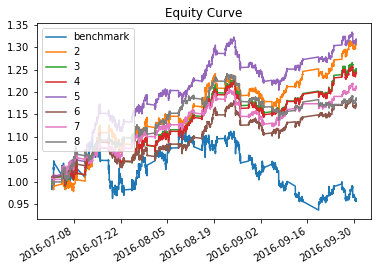

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.289459              0.004275                -0.003045   
1               0.241004              0.003549                -0.003202   
2               0.237994              0.003451                -0.003238   
3               0.271265              0.004355                -0.002800   
4               0.247600              0.002545                -0.002885   
5               0.253896              0.003054                -0.002697   
6               0.266215              0.002705                -0.002436   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.001700                  0.000102             -0.029125   
1                 0.001660                  0.000082             -0.028294   
2                 0.001667                  0.000079             -0.028294   
3                 0.001898                  0.000108             -0.028637   
4        

In [15]:
lm_validation = LmValidation(slm_th, symbol='rb_major', data_dir=r'C:/Documents/Qishi_QR/Output',
                                 valid_dir=r'C:/Documents/Qishi_QR/Validation', 
                             max_order=7, offsets_average=True, n_offsets=5)
lm_validation.run()

C:\Users\Shufang\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Shufang\Documents\Qishi_QR\Backtesting\Vectorized\backtest.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.result['signal_bar'][0] = 0


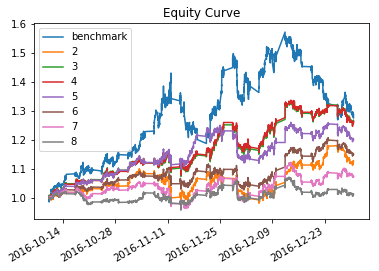

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.393061              0.002042                -0.004093   
1               0.357089              0.003929                -0.004192   
2               0.349904              0.003885                -0.004206   
3               0.376793              0.003088                -0.003690   
4               0.351871              0.002375                -0.003837   
5               0.375365              0.001260                -0.003645   
6               0.368255              0.000281                -0.003224   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.002127                  0.000051             -0.042944   
1                 0.002144                  0.000090             -0.042579   
2                 0.002150                  0.000088             -0.042579   
3                 0.002470                  0.000078             -0.042259   
4        

In [16]:
lm_validation = LmValidation(slm_th, start='2016-10-1',end='2016-12-31',symbol='rb_major', 
                             data_dir=r'C:/Documents/Qishi_QR/Output',
                            valid_dir=r'C:/Documents/Qishi_QR/Validation', max_order=7, offsets_average=True, n_offsets=5)
lm_validation.run()

## type 3 threshold

In [18]:
slm_th = SLM(slm, 0.05, th_type=3).run()

C:\Users\Shufang\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Shufang\Documents\Qishi_QR\Backtesting\Vectorized\backtest.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.result['signal_bar'][0] = 0


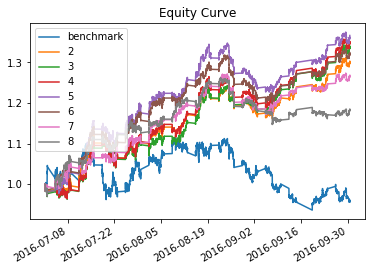

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.303568              0.004176                -0.003107   
1               0.303556              0.004617                -0.003215   
2               0.305159              0.004748                -0.003096   
3               0.317126              0.004922                -0.003331   
4               0.331756              0.004430                -0.003085   
5               0.304355              0.003756                -0.003028   
6               0.305377              0.002689                -0.002663   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.001682                  0.000115             -0.031062   
1                 0.001680                  0.000134             -0.033814   
2                 0.001692                  0.000136             -0.029125   
3                 0.001897                  0.000160             -0.030262   
4        

In [19]:
lm_validation = LmValidation(slm_th, symbol='rb_major', data_dir=r'C:/Documents/Qishi_QR/Output',
                                 valid_dir=r'C:/Documents/Qishi_QR/Validation', 
                             max_order=7, offsets_average=True, n_offsets=5)
lm_validation.run()

C:\Users\Shufang\Anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\Shufang\Documents\Qishi_QR\Backtesting\Vectorized\backtest.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.result['signal_bar'][0] = 0


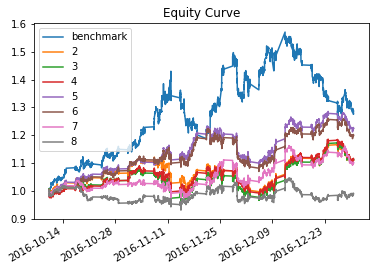

   Annualized Volatility  Average Daily Return  Average Negative Return  \
0               0.408890              0.001792                -0.004159   
1               0.417731              0.001832                -0.004261   
2               0.405128              0.001872                -0.004139   
3               0.407204              0.003450                -0.004414   
4               0.430685              0.003104                -0.004092   
5               0.434993              0.001704                -0.004038   
6               0.412337             -0.000071                -0.003555   

   Average Positive Return  Average Return per Trade  Largest Losing Trade  \
0                 0.002105                  0.000050             -0.042944   
1                 0.002119                  0.000053             -0.043610   
2                 0.002113                  0.000053             -0.042944   
3                 0.002401                  0.000112             -0.044936   
4        

In [20]:
lm_validation = LmValidation(slm_th, start='2016-10-1',end='2016-12-31',symbol='rb_major', 
                             data_dir=r'C:/Documents/Qishi_QR/Output',
                             valid_dir=r'C:/Documents/Qishi_QR/Validation', max_order=7, offsets_average=True, n_offsets=5)
lm_validation.run()